In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/drive/MyDrive/stockpriceprediction.csv')

In [3]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [4]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [5]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [6]:
df_new = df[['open', 'high', 'low', 'close','TARGET']]
df_new

,open,high,low,close,TARGET
0,17.799999,18.219000,17.500000,17.760000,0
1,17.700001,18.309999,17.620001,17.660000,0
2,17.580000,17.799999,16.910000,16.950001,0
3,16.650000,16.879999,16.139999,16.170000,0
4,16.219999,16.290001,15.630000,15.710000,0
...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,0
7777,23.350000,23.610001,23.250000,23.350000,0
7778,23.450001,23.570000,23.219999,23.350000,0
7779,23.330000,23.740000,23.330000,23.610001,0


In [7]:
X=df_new.iloc[:,0:4]
y = df_new.iloc[:,4]

In [8]:
X

,open,high,low,close
0,17.799999,18.219000,17.500000,17.760000
1,17.700001,18.309999,17.620001,17.660000
2,17.580000,17.799999,16.910000,16.950001
3,16.650000,16.879999,16.139999,16.170000
4,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001
7777,23.350000,23.610001,23.250000,23.350000
7778,23.450001,23.570000,23.219999,23.350000
7779,23.330000,23.740000,23.330000,23.610001


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7776    0
7777    0
7778    0
7779    0
7780    0
Name: TARGET, Length: 7781, dtype: int64

In [10]:
print(X.shape)
print(y.shape)


(7781, 4)
(7781,)


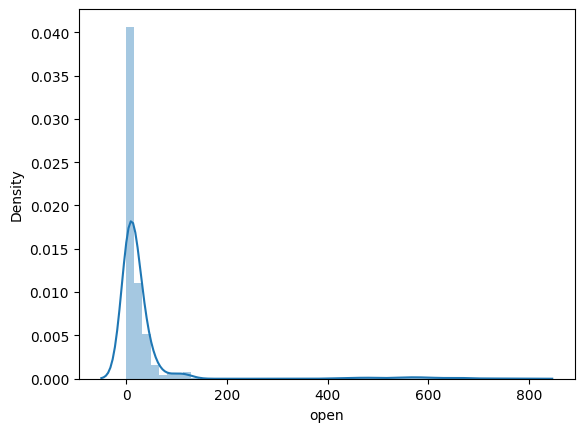

In [11]:
data = df_new['open']
sns.distplot(data)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6224, 4)
(1557, 4)
(6224,)
(1557,)


Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(max_depth = 5, n_estimators = 300)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=accuracy_score(y_pred1,y_test)
print(score)

0.8143866409762364


In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, zero_division=1))

Confusion Matrix:
 [[1268    0]
 [ 289    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1268
           1       1.00      0.00      0.00       289

    accuracy                           0.81      1557
   macro avg       0.91      0.50      0.45      1557
weighted avg       0.85      0.81      0.73      1557



Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=400, learning_rate=0.05, random_state=100, max_features=7 )
gbc.fit(X_train, y_train)
y_pred2 = gbc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=accuracy_score(y_pred2,y_test)
print(score)

0.8137443802183687


In [25]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

Confusion Matrix:
 [[1260    8]
 [ 282    7]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1268
           1       0.47      0.02      0.05       289

    accuracy                           0.81      1557
   macro avg       0.64      0.51      0.47      1557
weighted avg       0.75      0.81      0.74      1557



Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred3= tree_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=accuracy_score(y_pred3,y_test)
print(score)

0.7418111753371869


In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print(classification_report(y_test,y_pred3))

Confusion Matrix:
 [[1081  187]
 [ 215   74]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1268
           1       0.28      0.26      0.27       289

    accuracy                           0.74      1557
   macro avg       0.56      0.55      0.56      1557
weighted avg       0.73      0.74      0.74      1557

